# -------------------------------PROJECT---------------------------------------

# Comparative Analysis between DCT and DWT Techniques of Image Compression

## YUVRAJ DAN (204102320)

## Libraries use in this project

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pywt.data
import pywt
import matplotlib.image as mpimg
import cv2
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct
import warnings
warnings.filterwarnings("ignore")
import math



## (A)DWT (Haar Transform) Techniques for Image Compression

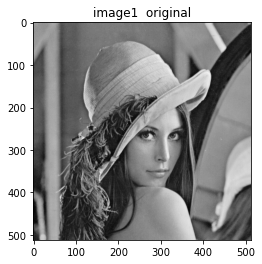

In [70]:

imgpath1= "C:\\Users\\DELL\\Desktop\\lenna.png"
image1=cv2.imread(imgpath1,1)
imgpath2= "C:\\Users\\DELL\\Desktop\\IITG.jpg"
image2=cv2.imread(imgpath2,1)
imgpath3= "C:\\Users\\DELL\\Desktop\\noisyimg.jpg"
image3=cv2.imread(imgpath3,1)

image1=np.mean(image1,-1)
image2=np.mean(image2,-1)
image3=np.mean(image3,-1)
plt.imshow(image1,cmap='gray')
plt.title("image1  original")
m,n = image1.shape
    

Text(0.5, 1.0, 'cD:Diagonal coeff.')

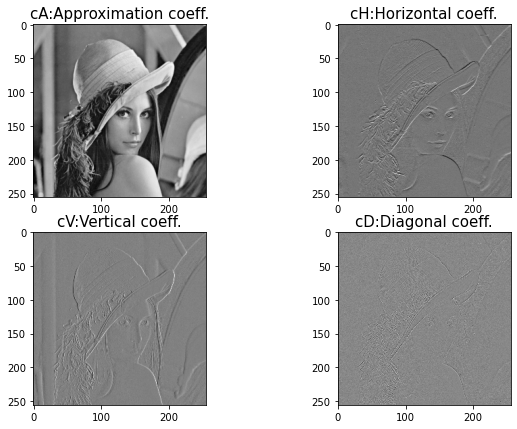

In [71]:
#we decompose the image into approximate,horizontal,vertical ,and diagonal coefficent
coeffs1=pywt.dwt2(image1,'haar',mode='periodization')
cA1,(cH1,cV1,cD1)=coeffs1

#plotiing haar coefficents
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.imshow(cA1,cmap=plt.cm.gray)
plt.title('cA:Approximation coeff.', fontsize=15)

plt.subplot(2,2,2)
plt.imshow(cH1,cmap=plt.cm.gray)
plt.title('cH:Horizontal coeff.', fontsize=15)

plt.subplot(2,2,3)
plt.imshow(cV1,cmap=plt.cm.gray)
plt.title('cV:Vertical coeff.', fontsize=15)

plt.subplot(2,2,4)
plt.imshow(cD1,cmap=plt.cm.gray)
plt.title('cD:Diagonal coeff.', fontsize=15)

Text(0.5, 1.0, 'reconstruct image')

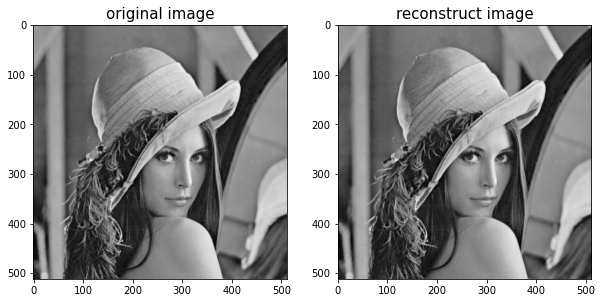

In [72]:
#reconstruct the image from decompostion coeffcents
imgr1=pywt.idwt2(coeffs1,'haar',mode='periodization')
imgr1=np.uint8(imgr1)
#plotiing original and reconstruct image
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(image1,cmap='gray')
plt.title('original image', fontsize=15)
plt.subplot(1,2,2)
plt.imshow(imgr1,cmap=plt.cm.gray)
plt.title('reconstruct image', fontsize=15)

Text(0.5, 1.0, 'image2  original')

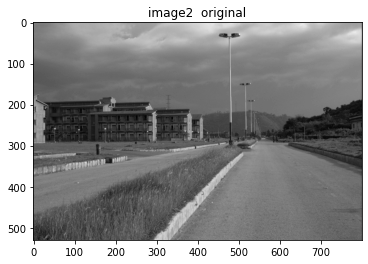

In [73]:
plt.imshow(image2,cmap='gray')
plt.title("image2  original")

Text(0.5, 1.0, 'cD:diagonal coeff.')

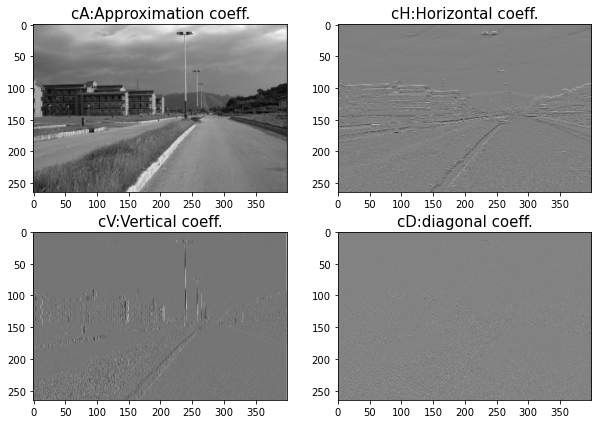

In [74]:
coeffs2=pywt.dwt2(image2,'haar',mode='periodization')
cA2,(cH2,cV2,cD2)=coeffs2

#plotiing haar coefficents
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.imshow(cA2,cmap=plt.cm.gray)
plt.title('cA:Approximation coeff.', fontsize=15)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap=plt.cm.gray)
plt.title('cH:Horizontal coeff.', fontsize=15)

plt.subplot(2,2,3)
plt.imshow(cV2,cmap=plt.cm.gray)
plt.title('cV:Vertical coeff.', fontsize=15)

plt.subplot(2,2,4)
plt.imshow(cD2,cmap=plt.cm.gray)
plt.title('cD:diagonal coeff.', fontsize=15)

Text(0.5, 1.0, 'reconstruct image')

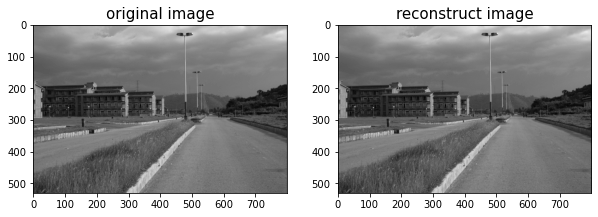

In [75]:
#reconstruct the image from decompostion coeffcents
imgr2=pywt.idwt2(coeffs2,'haar',mode='periodization')
imgr2=np.uint8(imgr2)

#plotiing original and reconstruct image
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(image2,cmap='gray')
plt.title('original image', fontsize=15)
plt.subplot(1,2,2)
plt.imshow(imgr2,cmap=plt.cm.gray)
plt.title('reconstruct image', fontsize=15)

### (a) 'Mean Squared Error' between the original image and reconstruct image

In [76]:
def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err

m1 = mse(image1, imgr1)
m2 = mse(image2, imgr2)

print("mean square error is:",np.round(m1,5))
print("mean square error is:",np.round(m2,5))

mean square error is: 0.18632
mean square error is: 0.17685


### (b)energy calculation in original image and decomposition coefficient of image

In [77]:
#energy calculation in original image and decomposition coefficient of image
#for 1st image 
cHsq = [[elem * elem for elem in inner] for inner in cH1]
cVsq = [[elem * elem for elem in inner] for inner in cV1]
cDsq = [[elem * elem for elem in inner] for inner in cD1]
Energy = (np.sum(cHsq) + np.sum(cVsq) + np.sum(cDsq))/(m*n)
print ("energy of horizontal,vertical and diagonal cofficent is :",np.round(Energy,6),'joule')

E1_approx_coeff=np.sum((cA1.astype("float"))**2)/float(image1.shape[0] * image1.shape[1])
E1_original=np.sum((image1.astype("float"))**2)/float(image1.shape[0] * image1.shape[1])

print(" energy of approximate coeff. of  image1 is:",np.round(E1_approx_coeff,6),'joule')
print("energy of original image1 is:",np.round(E1_original,6),'joule')

energy of horizontal,vertical and diagonal cofficent is : 40.002492 joule
 energy of approximate coeff. of  image1 is: 18231.298505 joule
energy of original image1 is: 18271.300997 joule


In [78]:
#energy calculation in original image and decomposition coefficient of image
#for 2nd image 
cHsq = [[elem * elem for elem in inner] for inner in cH2]
cVsq = [[elem * elem for elem in inner] for inner in cV2]
cDsq = [[elem * elem for elem in inner] for inner in cD2]
Energy = (np.sum(cHsq) + np.sum(cVsq) + np.sum(cDsq))/(m*n)
print ("energy of horizontal,vertical and diagonal cofficent is :",np.round(Energy,6),'joule')

E1_approx_coeff=np.sum((cA2.astype("float"))**2)/float(image2.shape[0] * image2.shape[1])
E1_original=np.sum((image2.astype("float"))**2)/float(image2.shape[0] * image2.shape[1])

print(" energy of approximate coeff. of  image1 is:",np.round(E1_approx_coeff,6),'joule')
print("energy of original image1 is:",np.round(E1_original,6),'joule')

energy of horizontal,vertical and diagonal cofficent is : 45.031447 joule
 energy of approximate coeff. of  image1 is: 13782.971813 joule
energy of original image1 is: 13810.813142 joule


### (c) calculate the Structural Similarity Index (SSIM) between original and reconstructed images

In [79]:
#calculate the Structural Similarity Index (SSIM) between original and reconstructed images
from skimage.measure import compare_ssim
(score1, diff1) = compare_ssim(image1,imgr1, full=True)
diff1 = (diff1 * 255).astype("uint8")

(score2, diff2) = compare_ssim(image2,imgr2, full=True)
diff2 = (diff2 * 255).astype("uint8")


print("Structural Similarity Index (SSIM)b/w image1 and reconstructed image1:",np.round(score1,3))
print("Structural Similarity Index (SSIM)b/w image2 and reconstructed image2:",np.round(score2,3))

Structural Similarity Index (SSIM)b/w image1 and reconstructed image1: 0.998
Structural Similarity Index (SSIM)b/w image2 and reconstructed image2: 0.995


### (d)Peak Signal to Noise Ratio (PSNR) in for an Image

In [80]:
#Peak Signal to Noise Ratio (PSNR) in for an Image

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d1=psnr(image1,imgr1)
d2=psnr(image2,imgr2)
print("Peak Signal to Noise Ratio (PSNR) in for an Image1 :",np.round(d1,6),"db")
print("Peak Signal to Noise Ratio (PSNR) in for an Image2 :",np.round(d2,6),"db")

Peak Signal to Noise Ratio (PSNR) in for an Image1 : 55.428268 db
Peak Signal to Noise Ratio (PSNR) in for an Image2 : 55.654738 db


## (B)DISCERTE COSINE TRANSFORM Techniques for Image Compression

(<matplotlib.image.AxesImage at 0x28cb9e1c580>,
 (-0.5, 799.5, 529.5, -0.5),
 Text(0.5, 1.0, 'reconsruct image'))

<Figure size 432x288 with 0 Axes>

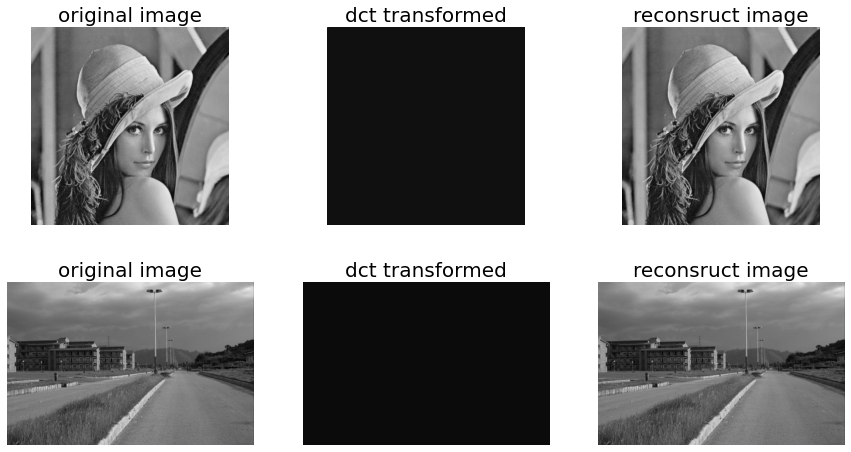

In [81]:

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

# read lena RGB image and convert to grayscale
#im = rgb2gray(imread('images/lena.jpg')) 
image1F = dct2(image1)
reconsruct1 = idct2(image1F)
image2F = dct2(image2)
reconsruct2 = idct2(image2F)

# check if the reconstructed image is nearly equal to the original image
#np.allclose(im, im1)
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.imshow(image1), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(2,3,2)
plt.imshow(image1F), plt.axis('off'), plt.title('dct transformed', size=20)
plt.subplot(2,3,3)
plt.imshow(reconsruct1), plt.axis('off'), plt.title('reconsruct image', size=20)
plt.subplot(2,3,4)
plt.imshow(image2), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(2,3,5)
plt.imshow(image2F), plt.axis('off'), plt.title('dct transformed', size=20)
plt.subplot(2,3,6)
plt.imshow(reconsruct2), plt.axis('off'), plt.title('reconsruct image', size=20)

### (a) 'Mean Squared Error' between the original image and reconstruct image

In [82]:
#calculating mean square error for original images and reconstructed images 
def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err

m1 = mse(image1, reconsruct1)
m2 = mse(image2, reconsruct2)
print("mean square error  for image1 is:",m1)
print("mean square error for image2 is:",m2)

mean square error  for image1 is: 2.3416935378057303e-27
mean square error for image2 is: 3.895917375900613e-27


### (b)energy calculation in original image and decomposition coefficient of image

In [83]:
#calculating energy retain for original images and dct ransform  images 
E1_original=np.sum((image1.astype("float"))**2)/float(image1.shape[0] * image1.shape[1])
E1_dct_transform=np.sum((image1F.astype("float"))**2)/float(image1F.shape[0] * image1F.shape[1])
print("energy of original image1 is:",np.round(E1_original,6),'joule')
print(" energy of DCT of  image1 is:",np.round(E1_dct_transform,6),'joule')

E2_original=np.sum((image2.astype("float"))**2)/float(image2.shape[0] * image2.shape[1])
E2_dct_transform=np.sum((image2F.astype("float"))**2)/float(image2F.shape[0] * image2F.shape[1])
print("energy of original image2 is:",np.round(E2_original,6),'joule')
print(" energy of DCT of  image2 is:",np.round(E2_dct_transform,6),'joule')

energy of original image1 is: 18271.300997 joule
 energy of DCT of  image1 is: 18271.300997 joule
energy of original image2 is: 13810.813142 joule
 energy of DCT of  image2 is: 13810.813142 joule


### (c) calculate the Structural Similarity Index (SSIM) between original and reconstructed images

In [84]:
#calculate the Structural Similarity Index (SSIM) between original and reconstructed images
from skimage.measure import compare_ssim
(score1, diff1) = compare_ssim(image1,reconsruct1, full=True)
diff1 = (diff1 * 255).astype("uint8")

(score2, diff2) = compare_ssim(image2,reconsruct2, full=True)
diff2 = (diff2 * 255).astype("uint8")


print("Structural Similarity Index (SSIM)b/w image1 and reconstructed image1:",np.round(score1,3))
print("Structural Similarity Index (SSIM)b/w image2 and reconstructed image2:",np.round(score2,3))

Structural Similarity Index (SSIM)b/w image1 and reconstructed image1: 1.0
Structural Similarity Index (SSIM)b/w image2 and reconstructed image2: 1.0


### (d) Peak Signal to Noise Ratio (PSNR) in for an Image

In [85]:
#Peak Signal to Noise Ratio (PSNR) in for an Image

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d1=psnr(image1,reconsruct1)
d2=psnr(image2,reconsruct2)
print("Peak Signal to Noise Ratio (PSNR) in for an Image1 :",np.round(d1,6),"db")
print("Peak Signal to Noise Ratio (PSNR) in for an Image2 :",np.round(d2,6), "db")

Peak Signal to Noise Ratio (PSNR) in for an Image1 : 314.435503 db
Peak Signal to Noise Ratio (PSNR) in for an Image2 : 312.224706 db
